In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  

In [2]:
TTable_Obs=pd.read_excel('China2020_2021\Data2022\ThreeYearmonthdata\TTable_2.xlsx')
TTable_Obs_T=TTable_Obs.T
TTable_Obs_T=TTable_Obs_T.drop([3],axis=1)
TTable_Obs_T=TTable_Obs_T.rename(columns={4:3})
TTable_Obs_T=TTable_Obs_T.rename(columns={0:'T',1:'G',2:'C',3:'R'})

TTable=pd.read_excel('China2020_2021\Data2022\ThreeYearmonthdata\TTable_3.xlsx')
TTable_T=TTable.T
TTable_T=TTable_T.drop([3],axis=1)
TTable_T=TTable_T.rename(columns={4:3})
TTable_T=TTable_T.rename(columns={0:'T',1:'G',2:'C',3:'R'})

In [3]:
array_Obs = TTable_Obs_T.values
Y_Obs=array_Obs[:9,3]

In [4]:
from sklearn.tree import DecisionTreeRegressor 

In [5]:
array = TTable_T.values

In [6]:
X = array[9:,0:3]
Y = array[9:,3]

In [7]:
model = DecisionTreeRegressor(max_leaf_nodes = 20)

In [8]:
X

array([[1129.5,  259.2, 3929.9],
       [1526.6,  289.1, 4871.1],
       [1497.5,  257.6, 4016.8],
       [1274. ,  222.3, 3708.5],
       [1124.8,  222. , 3866.2],
       [ 967.2,  234.8, 3412.8],
       [ 889.3,  178.8, 3308.3],
       [1059.3,  193.4, 3612.2],
       [1017.8,  203.1, 3376.1],
       [ 798.7,  154.7, 3082.7],
       [ 689. ,  147.2, 2609. ],
       [1490.5,  267.9, 4428.1],
       [1427. ,  212. , 3465.1],
       [1153.2,  198.6, 3228.1],
       [1058.4,  204.7, 3397.5],
       [ 946. ,  212.4, 3051.7],
       [ 934.1,  174.9, 3056.2],
       [1091.4,  217.9, 3668.8],
       [1044.1,  220.1, 3222.8],
       [1000.1,  185.5, 3053.9]])

In [9]:
Y_result=[]
for i in range(9):
    rt=model.fit(X,Y)
    X_pre=array[8-i:9-i,0:3]
    Y_pre = model.predict(X_pre)
    Y_result.insert(0,Y_pre)
    X=np.insert(X,0,X_pre.flatten())
    X=np.reshape(X,(int(X.size/3),3))
    Y=np.insert(Y,0,Y_Obs[8-i])
    print(i)
    

0
1
2
3
4
5
6
7
8


In [10]:
Y_result

[array([35484.1]),
 array([40804.6]),
 array([40566.]),
 array([36833.]),
 array([34444.9]),
 array([34494.9]),
 array([39514.2]),
 array([33152.6]),
 array([33878.1])]

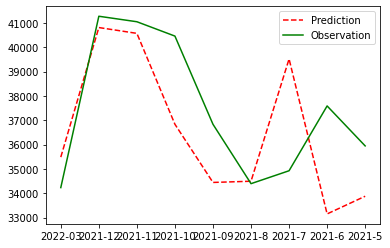

In [11]:
Date=[ '2022-03', '2021-12','2021-11',
       '2021-10', '2021-09',
       '2021-8','2021-7','2021-6','2021-5']

plt.plot(Date,Y_result,'r--',label="Prediction")
plt.plot(Date,Y_Obs,'g',label="Observation")
plt.legend()

In [12]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_Obs,Y_result))
print('Mean Squared Error:', metrics.mean_squared_error(Y_Obs,Y_result))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_Obs,Y_result)))

Mean Absolute Error: 2154.5333333333338
Mean Squared Error: 7313091.533333336
Root Mean Squared Error: 2704.2728289381853


In [13]:
TTable_T

T      G       C        R
2021-12-01  1487.2  289.4  4651.3  34233.1
2021-11-01  1484.1  270.2  3777.0  41268.9
2021-10-01  1227.2  247.5  3396.8  41043.2
2021-09-01  1062.9  262.5  3535.4  40453.9
2021-08-01   899.6  250.2  3280.1  36833.0
2021-07-01   944.6  203.1  3347.2  34394.9
2021-06-01  1174.3  240.1  3866.7  34925.1
2021-05-01  1129.9  262.3  3688.1  37585.8
2021-04-01  1030.5  222.1  3684.7  35945.1
2021-03-01  1129.5  259.2  3929.9  33152.6
2020-12-01  1526.6  289.1  4871.1  35484.1
2020-11-01  1497.5  257.6  4016.8  40566.0
2020-10-01  1274.0  222.3  3708.5  39514.2
2020-09-01  1124.8  222.0  3866.2  38576.5
2020-08-01   967.2  234.8  3412.8  35294.7
2020-07-01   889.3  178.8  3308.3  33570.6
2020-06-01  1059.3  193.4  3612.2  32202.5
2020-05-01  1017.8  203.1  3376.1  33525.9
2020-04-01   798.7  154.7  3082.7  31972.8
2020-03-01   689.0  147.2  2609.0  28177.8
2019-12-01  1490.5  267.9  4428.1  26449.9
2019-11-01  1427.0  212.0  3465.1  38776.7
2019-10-01  1153.2  198.6  3228.1  38093.8
2019-09-01  1058.4  204.7  3397.5  38104.3
2019-08-01   946.0  212.4  3051.7  34494.9
2019-07-01   934.1  174.9  3056.2  33896.3
2019-06-01  1091.4  217.9  3668.8  33073.3
2019-05-01  1044.1  220.1  3222.8  33878.1
2019-04-01  1000.1  185.5  3053.9  32955.7

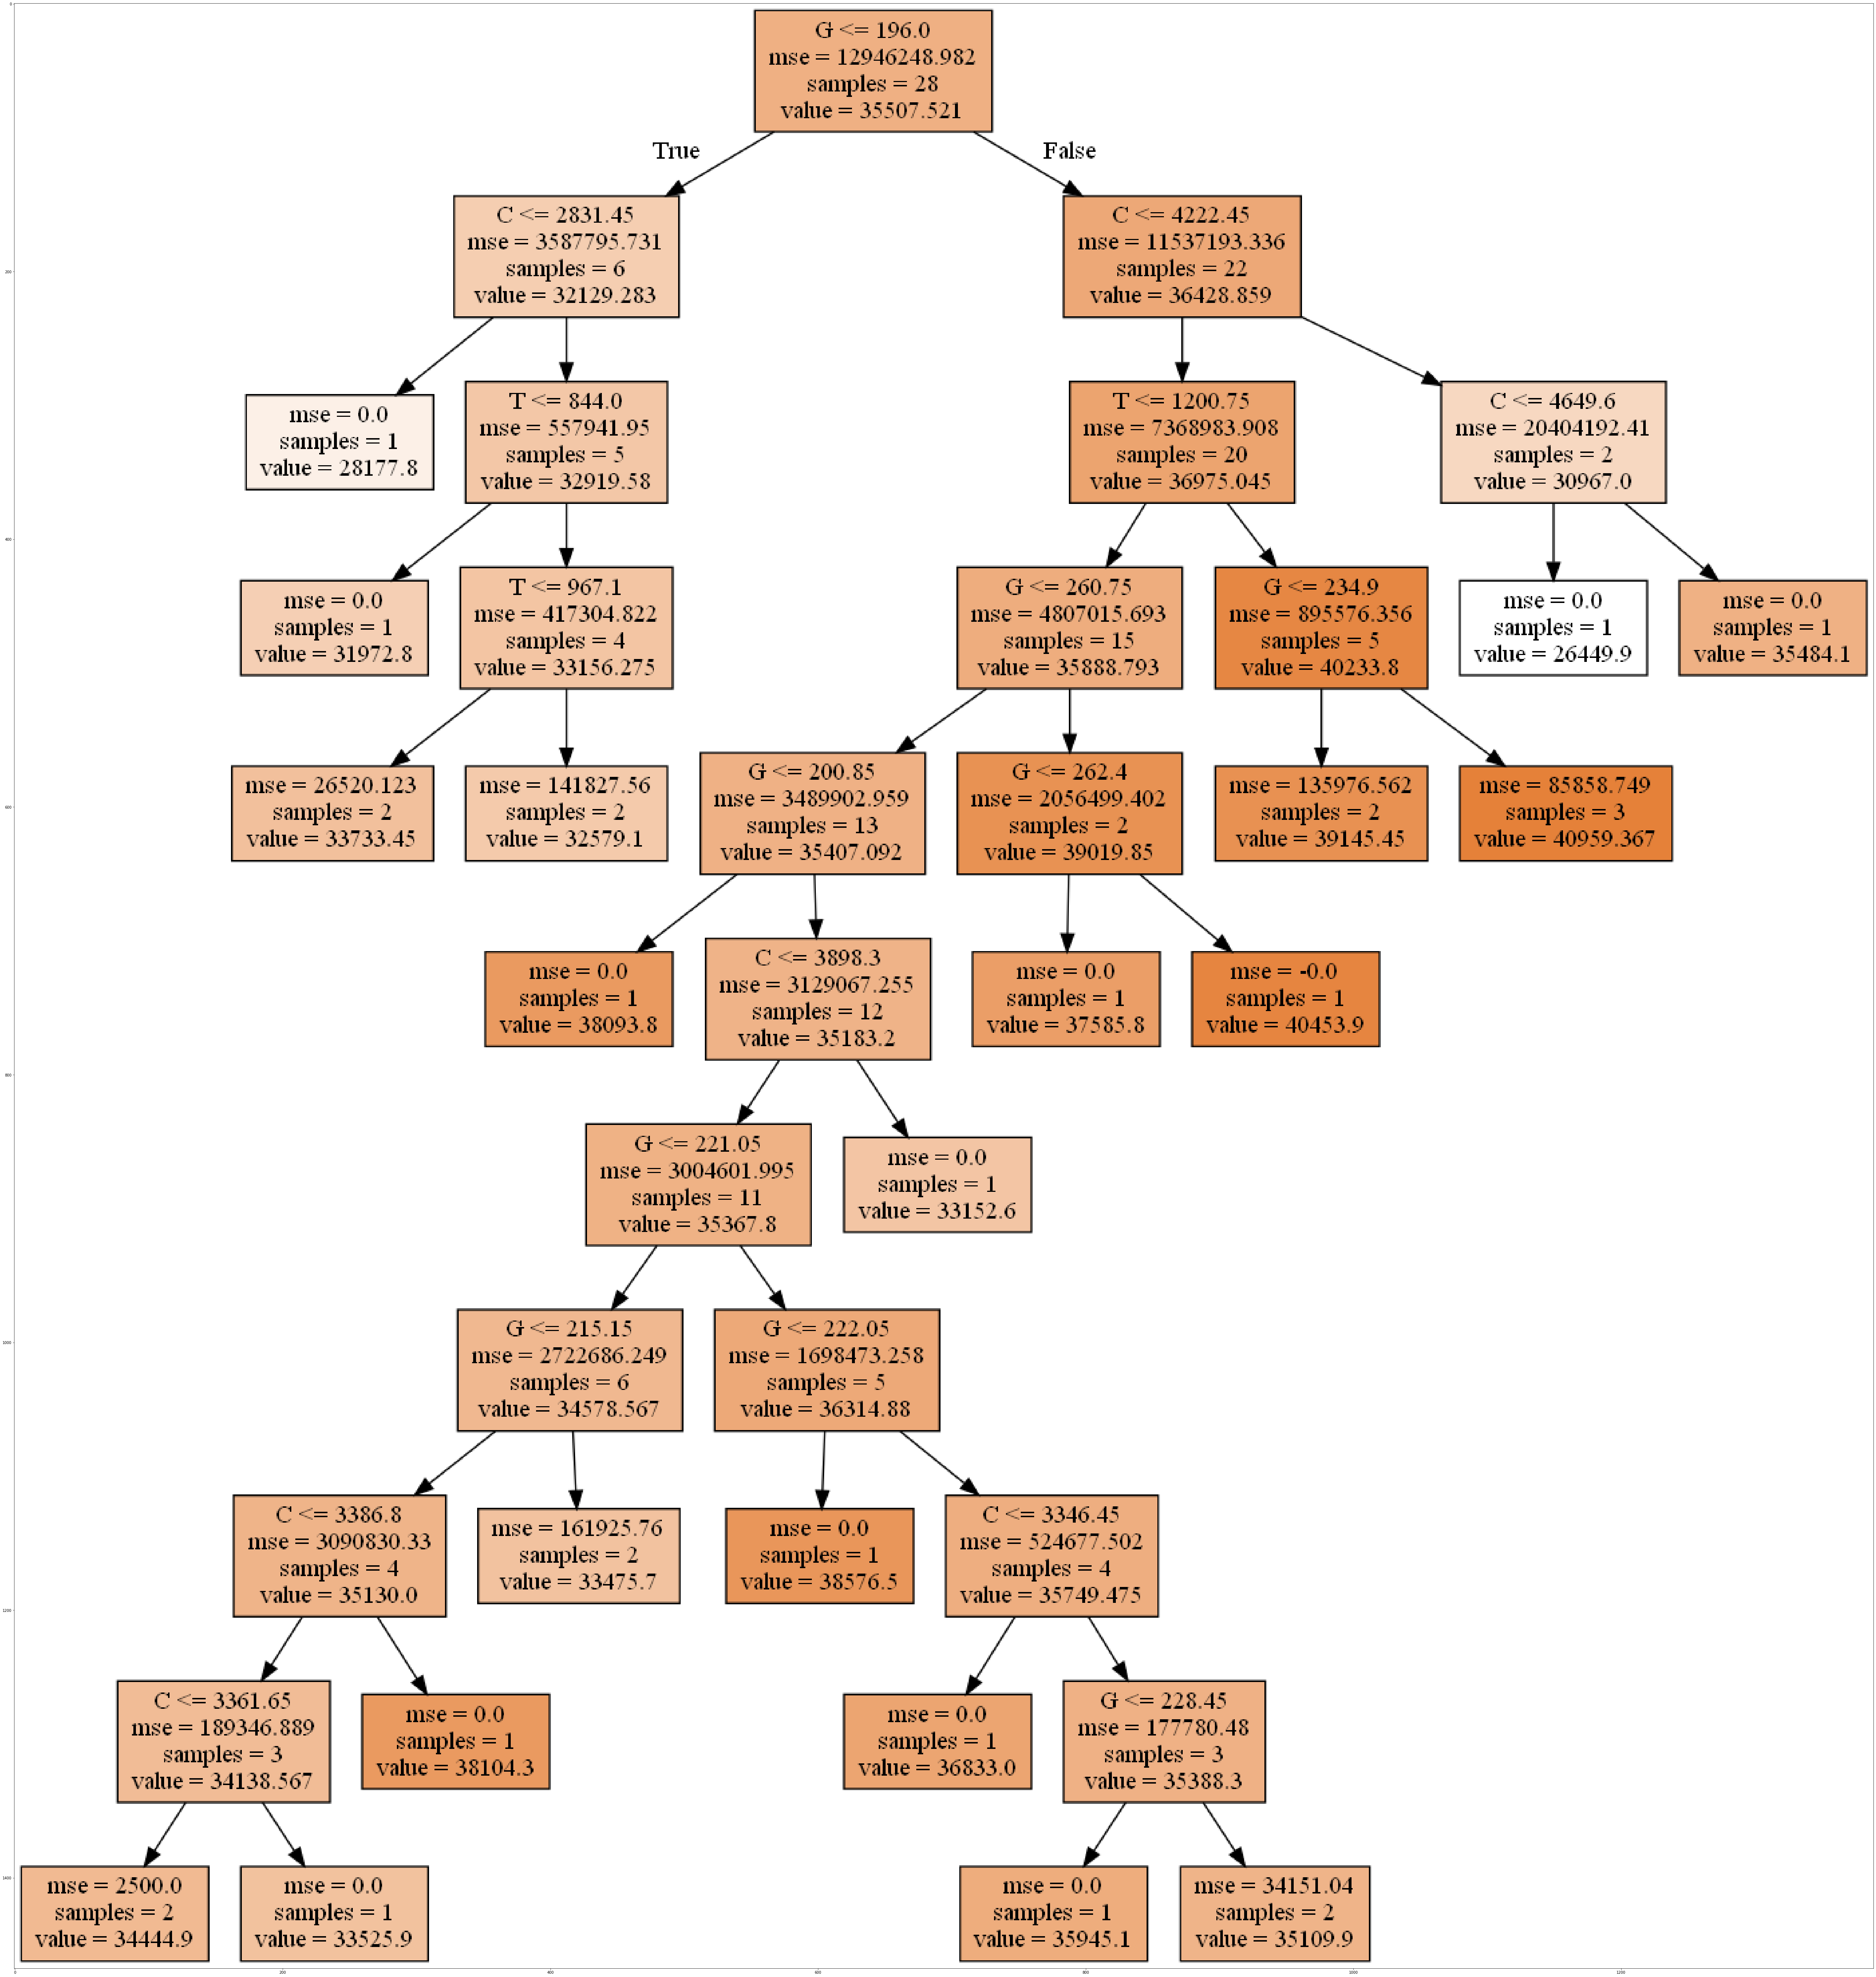

In [14]:
from IPython.display import Image  
from sklearn import tree
import matplotlib.image as mpimg
import pydotplus
import io
import matplotlib.pyplot as plt

import sys
dot_data = io.StringIO()
names=['T','G','C']
tree.export_graphviz(rt, out_file=dot_data, filled=True, feature_names = names, class_names = 'R')

# Draw graph
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('dt.png')

plt.figure(figsize=(100, 100))
img = mpimg.imread('dt.png')
imgplot = plt.imshow(img)

plt.show()

In [15]:
# G > 234.9  T> 1200.75 C> 4222.45 TGC

In [51]:
X_prove=[[1201,280, 4222]]
Y_1 = model.predict(X_prove)

In [52]:
Y_1

array([40959.36666667])